# Statistical Analysis of Lexical Decision Task

The experiment is performed by a beginner Dutch speaker twice (me)

## 1. Import the modules

In [68]:
import math
import statistics
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 2. Load the data

In [2]:
path = '/Users/Cecilia/Desktop/python/session_3/session3'

In [13]:
participants = [1, 2] # create list with participants

trials = pd.DataFrame()
for participant in participants:
    trials_per_participant = pd.read_csv(f'lexical_decition_{participant}.csv')
    trials_per_participant['participant_id'] = participant
    # Change the coding for accuracy from 'C' and 'N' to '1' and '0'
    trials_per_participant['accuracy'] = trials_per_participant['accuracy'].str.replace('C', '1')
    trials_per_participant['accuracy'] = trials_per_participant['accuracy'].str.replace('N', '0')
    trials_per_participant['accuracy'] = trials_per_participant['accuracy'].astype(int)

    trials = trials.append(trials_per_participant)
    
    trials.rename(columns={'Unnamed: 0': 'trial_order'}, inplace=True)

trials

,trial_order,trial,key,condition,freq_category,accuracy,start_time,end_time,reaction_time,participant_id,trial_order
0,0.0,women_sound,m,nw,none,1,1.908694,3.503617,1.594923,1,NaN
1,1.0,monen_sound,z,nw,none,0,4.049231,5.591696,1.542466,1,NaN
2,2.0,plaats_sound,z,rw,HF,1,6.140249,7.263560,1.123311,1,NaN
3,3.0,rieve_sound,z,nw,none,0,7.795049,9.767635,1.972587,1,NaN
4,4.0,prookt_sound,m,nw,none,1,10.303033,11.567537,1.264504,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
195,NaN,monen_sound,m,nw,none,1,305.881664,306.705345,0.823681,2,195.0
196,NaN,krijg_sound,z,rw,HF,1,307.253952,307.993560,0.739607,2,196.0
197,NaN,gals_sound,z,nw,none,0,308.540717,309.185322,0.644605,2,197.0
198,NaN,kimensie_sound,z,nw,none,0,309.727772,310.537421,0.809649,2,198.0


## 3. Summary of the data

Summary per Participant

In [16]:
summary_per_participant = trials.groupby(by=['participant_id', 'freq_category']).aggregate(
    mean_RT = pd.NamedAgg('reaction_time', np.mean),
    std_RT = pd.NamedAgg('reaction_time', np.std),
    mean_accuracy = pd.NamedAgg('accuracy', np.mean),
    std_accuracy = pd.NamedAgg('accuracy', np.std),
)
summary_per_participant.reset_index(inplace=True)
summary_per_participant

,participant_id,freq_category,mean_RT,std_RT,mean_accuracy,std_accuracy
0,1,HF,1.168297,0.457119,0.88,0.328261
1,1,LF,1.162130,0.318139,0.42,0.498569
2,1,none,1.222703,0.379115,0.73,0.446196
3,2,HF,0.870233,0.180469,0.88,0.328261
4,2,LF,1.149020,0.295963,0.44,0.501427
5,2,none,1.005928,0.233369,0.70,0.460566


Summary for all(2) participants

In [17]:
summary = trials.groupby(by=['condition', 'freq_category']).aggregate(
    mean_RT = pd.NamedAgg('reaction_time', np.mean),
    std_RT = pd.NamedAgg('reaction_time', np.std),
    mean_accuracy = pd.NamedAgg('accuracy', np.mean),
    std_accuracy = pd.NamedAgg('accuracy', np.std),
)
summary.reset_index(inplace=True)
summary

,condition,freq_category,mean_RT,std_RT,mean_accuracy,std_accuracy
0,nw,none,1.114316,0.332271,0.715,0.452547
1,rw,HF,1.019265,0.376800,0.880,0.326599
2,rw,LF,1.155575,0.305766,0.430,0.497570


## 4. Explore the data

Visualize the reaction times per frequency catogory

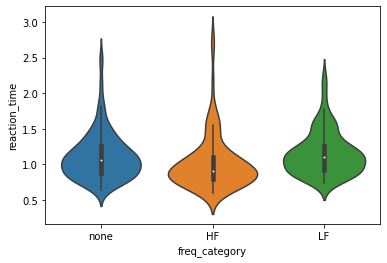

In [19]:
ax = sns.violinplot(x="freq_category", y="reaction_time", data=trials)
plt.show()

Visualize the accuracy per frequency catogory

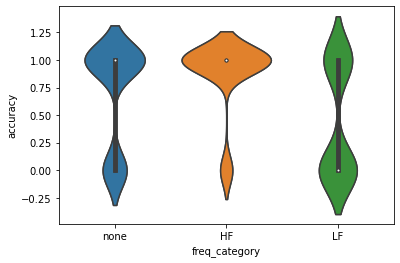

In [21]:
ax = sns.violinplot(x="freq_category", y="accuracy", data=trials)
plt.show()

## 5. Testing assumptions

Histogram for reaction time for real and nonreal words

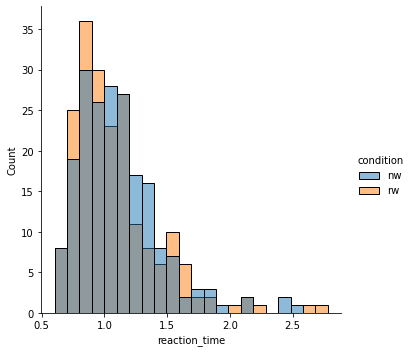

In [23]:
sns.displot(trials, x="reaction_time", hue="condition")
plt.show()

Histogram for reaction time for high and low frequency words

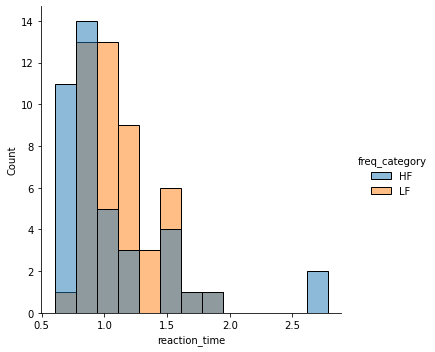

In [69]:
trials_real_word = trials.drop(trials[trials.freq_category == 'none'].index)

sns.displot(trials_real_word, x="reaction_time", hue="freq_category")
plt.show()

Can't perform Shapiro-Wilks test with less than 3 participants 
(If more data is available this can be used)

In [53]:
shapiro_results = summary_per_participant.groupby(by='freq_category').aggregate(
    shapiro=pd.NamedAgg('mean_RT',stats.shapiro))

shapiro_results.reset_index(inplace=True)
shapiro_results

ValueError: Data must be at least length 3.

## 6. Statistical testing

Comparing reaction times for real and nonreal words

In [63]:
Rw = trials.loc[trials['condition']=='rw', 'reaction_time']
Nw = trials.loc[trials['condition']=='nw', 'reaction_time']


ttest_RwNw = stats.ttest_rel(Rw, Nw, nan_policy='raise')
print(ttest_RwNw)

Ttest_relResult(statistic=-0.841265171650924, pvalue=0.4012091572891079)


-0.841265171650924

Comparing reaction times for high frequency and low freaquency words

In [64]:
Hf = trials.loc[trials['freq_category']=='HF', 'reaction_time']
Lf = trials.loc[trials['freq_category']=='LF', 'reaction_time']


ttest_HfLf = stats.ttest_rel(Hf, Lf, nan_policy='raise')
print(ttest_HfLf)

Ttest_relResult(statistic=-2.733995140744255, pvalue=0.007413633709386874)


Comparing accuracy for real and nonreal words

In [66]:
Rw_acc = trials.loc[trials['condition']=='rw', 'accuracy']
Nw_acc = trials.loc[trials['condition']=='nw', 'accuracy']


ttest_RwNw_acc = stats.ttest_rel(Rw_acc, Nw_acc, nan_policy='raise')
print(ttest_RwNw_acc)

Ttest_relResult(statistic=-1.2812545410261347, pvalue=0.20159528505505833)


Comparing accuracy for high frequency and low freaquency words

In [67]:
Hf_acc = trials.loc[trials['freq_category'`]=='HF', 'accuracy']
Lf_acc = trials.loc[trials['freq_category']=='LF', 'accuracy']


ttest_HfLf_acc = stats.ttest_rel(Hf_acc, Lf_acc, nan_policy='raise')
print(ttest_HfLf_acc)

Ttest_relResult(statistic=7.385866259834607, pvalue=4.838342360864412e-11)
